## Chapter 2.1

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

#%matplotlib widget


no gdal


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from gempy.assets.geophysics import GravityGrid

In [3]:
g = GravityGrid()

In [4]:
a,b,c = g.create_irregular_grid_kernel(resolution=[10,10,20], radio=100)

In [6]:
tz = g.set_tz_kernel(resolution=[10,10,20], radio=100)
tz.shape

(2541,)

In [7]:
a.shape, b.shape

((2541, 3), (2541, 3))

(-200, 0)

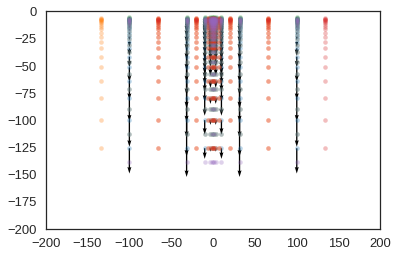

In [8]:
%matplotlib inline
plt.quiver(a[:, 0].reshape(11,11,21)[5,:,:].ravel(),
          a[:, 2].reshape(11,11,21)[:,5,:].ravel(),
         np.zeros(231),
         tz.reshape(11,11,21)[5, :, :].ravel()
         )

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() ,
         a[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.', alpha=.3)

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() - b[:, 0].reshape(11,11,21)[5,:,:].ravel(),
         a[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.', alpha=.3)

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel(),
         a[:, 2].reshape(11,11,21)[:,5,:].ravel() - b[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.' , alpha=.3)

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() + c[:, 0].reshape(11,11,21)[5,:,:].ravel(),
         a[:, 2].reshape(11,11,21)[:,5,:].ravel(), '.',  alpha=.3)

plt.plot(a[:, 0].reshape(11,11,21)[5,:,:].ravel() ,
         a[:, 2].reshape(11,11,21)[:,5,:].ravel() + c[:, 2].reshape(11,11,21)[5,:,:].ravel(), '.', alpha=.3)

plt.xlim(-200, 200)
plt.ylim(-200, 0)

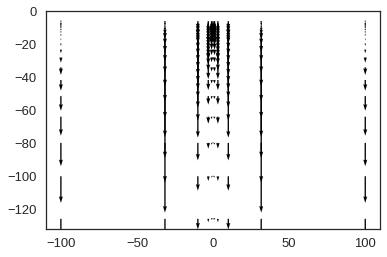

In [9]:
plt.quiver(a[:, 0].reshape(11,11,21)[5,:,:].ravel(),
          a[:, 2].reshape(11,11,21)[:,5,:].ravel(),
         np.zeros(231),
         tz.reshape(11,11,21)[5, :, :].ravel()
         )

Text(0.5, 0, 'Z Label')

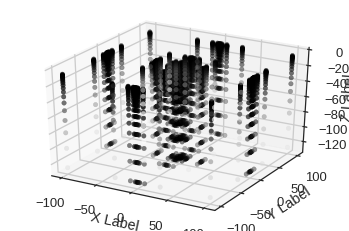

In [10]:
%matplotlib qt5
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(a[:, 0], a[:,1], a[:, 2], c = tz)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
